In [1]:
import pathlib
import os
from skimage.io import imread, imsave, imshow
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.patches as patches
% matplotlib inline

# process xml file
import xml.etree.ElementTree

# add progress bar when storing symbol data, installation from: https://github.com/tqdm/tqdm#installation
from tqdm import tqdm

In [2]:
# Glob the training data and load a single image path
# TODO: change this path to fit your dataset path
training_img_paths = pathlib.Path('../../').glob('*/images_png/*.png')
training_img_sorted = sorted([x for x in training_img_paths])
print('total number of images', len(training_img_sorted))

# mask and xml files
training_mask_paths = pathlib.Path('../../').glob('*/pix_annotations_png/*.png')
training_mask_sorted = sorted([x for x in training_mask_paths])

training_xml_paths = pathlib.Path('../../').glob('*/xml_annotations/*.xml')
training_xml_sorted = sorted([x for x in training_xml_paths])

im_path = training_img_sorted[0]
mask_path = training_mask_sorted[0]
xml_path = training_xml_sorted[0]
print(im_path)
print(mask_path)
print(xml_path)
im = imread(str(im_path))
mask = imread(str(mask_path))

total number of images 10000
..\..\Mask_RCNN\images_png\lg-100016039-aug-beethoven--page-4.png
..\..\Mask_RCNN\pix_annotations_png\lg-100016039-aug-beethoven--page-4.png
..\..\Mask_RCNN\xml_annotations\lg-100016039-aug-beethoven--page-4.xml


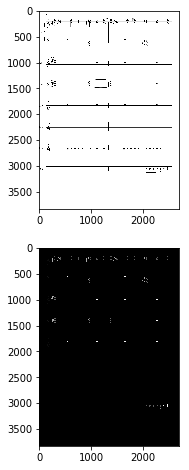

In [7]:
# show the image and mask to check they are consistent
plt.figure(figsize = (6, 8))
plt.subplot(211)
plt.imshow(im)

plt.subplot(212)
plt.imshow(mask, cmap = 'gray')

In [8]:
# uncomment this cell if you want to load previous symbol dict
class_dict = np.load('class_dict.npy').item()
print('Total number of symbols in the whole dataset:', len(class_dict))
print('The integer value for fClef is:', class_dict['fClef'])

Total number of symbols in the whole dataset: 114
The integer value for fClef is: 85


In [3]:
# get the information of all symbols in one image
def get_symbol_info(xml_path):
    root = xml.etree.ElementTree.parse(str(xml_path)).getroot()
    size = root.findall('size')
    width = float(size[0][0].text)
    height = float(size[0][1].text)
#     print(width, height)

    symbols = []
#     symbol_names = set() # use a set to store unique symbol names
#     rectangles = []

    # get the bounding box for each object, multiply with its width and height to get the real pixel coords
    for symbol in root.findall('object'):
        name = symbol.find('name').text
        xmin = round(float(symbol.find('bndbox')[0].text)*width)
        xmax = round(float(symbol.find('bndbox')[1].text)*width)
        ymin = round(float(symbol.find('bndbox')[2].text)*height)
        ymax = round(float(symbol.find('bndbox')[3].text)*height)

#         current_rectangle = name, (xmin, ymin), xmax - xmin, ymax - ymin
        current_symbol = name, xmin, xmax, ymin, ymax
#         rectangles.append(current_rectangle)
        symbols.append(current_symbol)
#         symbol_names.add(name)
    return symbols

In [4]:
symbols = get_symbol_info(xml_path)
# symbols_sorted = sorted(symbols, key=lambda element: (element[1], element[2], element[3], element[4]))
print(symbols[:10])

[('accidentalSharp', 1802, 1827, 125, 193), ('noteheadBlack', 2060, 2089, 181, 206), ('noteheadWhole', 2060, 2100, 647, 673), ('noteheadWhole', 2060, 2100, 602, 627), ('noteheadWhole', 2060, 2100, 567, 593), ('noteheadBlack', 2060, 2089, 3039, 3065), ('noteheadBlack', 2060, 2089, 204, 229), ('accidentalSharp', 2027, 2052, 546, 614), ('accidentalSharp', 1998, 2022, 580, 648), ('accidentalSharp', 2027, 2052, 626, 694)]


In [16]:
# _, filename = os.path.split(im_path)
# print(type(filename))
# data_dir = "D:/Downloads/cs231n-project/dataset/symbol_data/"
# if not os.path.isdir(data_dir + 'blacknote'):
#     os.makedirs(data_dir + 'blacknote')

data_dir = "D:/Downloads/DeepScores_archive0/Mask_RCNN" 
print(os.path.isdir(data_dir))

True


In [6]:
# prepare the correct data organization structure suitable for Pytorch training
# TODO: change this folder name where you want to store the data
train_dir = "D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/train/" # store train, val, test into different folders
val_dir = "D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/val/"
test_dir = "D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/test/"

print('total number of images in the dataset', len(training_img_sorted))
num_train = 8000
num_val = 1000
num_test = 1000


total number of images in the dataset 10000


In [ ]:
# prepare training data
for ind in tqdm(range(num_train)):
    im_path = training_img_sorted[ind]
    xml_path = training_xml_sorted[ind]
    im = imread(str(im_path))
    symbols = get_symbol_info(xml_path)
    for i, symbol in enumerate(symbols):
        _, img_name = os.path.split(im_path)
        name, xmin, xmax, ymin, ymax = symbol[0], symbol[1], symbol[2], symbol[3], symbol[4]
        # if dir not exist, create one before storing the data
        if not os.path.isdir(train_dir + name):
            os.makedirs(train_dir + name)

        # store the cropped single symbol into folder
        filename = os.path.join(train_dir, name, img_name+str(i)+'.png')
        imsave(filename, im[ymin:ymax+1, xmin:xmax+1, :])

print('training data preparation finished!')

In [22]:
# prepare val data
for ind in tqdm(range(300)):
    im_path = training_img_sorted[ind+num_train]
    xml_path = training_xml_sorted[ind+num_train]
    im = imread(str(im_path))
    symbols = get_symbol_info(xml_path)
    for i, symbol in enumerate(symbols):
        _, img_name = os.path.split(im_path)
        name, xmin, xmax, ymin, ymax = symbol[0], symbol[1], symbol[2], symbol[3], symbol[4]
        # if dir not exist, create one before storing the data
        if not os.path.isdir(val_dir + name):
            os.makedirs(val_dir + name)

        # store the cropped single symbol into folder
        filename = os.path.join(val_dir, name, img_name+str(i)+'.png')
        imsave(filename, im[ymin:ymax+1, xmin:xmax+1, :])

print('val data preparation finished!')


 45%|████████████████████████████████████                                            | 135/300 [02:24<02:56,  1.07s/it]


 49%|███████████████████████████████████████▍                                        | 148/300 [02:43<02:47,  1.10s/it]C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/val/articStaccatoBelow\lg-692291212817757934-aug-emmentaler--page-4.png437.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/val/articStaccatoBelow\lg-692291212817757934-aug-emmentaler--page-4.png552.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/val/articStaccatoBelow\lg-692291212817757934-aug-emmentaler--page-4.png560.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-p

MemoryError: 

In [7]:
# prepare test data
for ind in range(num_test):
    im_path = training_img_sorted[ind+num_train+num_val]
    xml_path = training_xml_sorted[ind+num_train+num_val]
    im = imread(str(im_path))
    symbols = get_symbol_info(xml_path)
    for i, symbol in enumerate(symbols):
        _, img_name = os.path.split(im_path)
        name, xmin, xmax, ymin, ymax = symbol[0], symbol[1], symbol[2], symbol[3], symbol[4]
        # if dir not exist, create one before storing the data
        if not os.path.isdir(test_dir + name):
            os.makedirs(test_dir + name)

        # store the cropped single symbol into folder
        filename = os.path.join(test_dir, name, img_name+str(i)+'.png')
        imsave(filename, im[ymin:ymax+1, xmin:xmax+1, :])

print('test data preparation finished!')

C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/test/articStaccatoBelow\lg-81042921-aug-emmentaler--page-9.png224.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/test/articStaccatoAbove\lg-81042921-aug-gonville--page-4.png413.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/test/articStaccatoAbove\lg-85787536-aug-beethoven--page-1.png3.png is a low contrast image
  warn('%s is a low contrast image' % fname)
C:\Users\johnl\Anaconda3\lib\site-packages\skimage\io\_io.py:132: UserWarning: D:/Downloads/DeepScores_archive0/Mask_RCNN/symbol_data/test/articStaccatoAbove\lg-85787536-aug-beethoven--p

IndexError: cannot do a non-empty take from an empty axes.

In [46]:
# # save the symbol_type set for convenience
# np.save('symbol_type.npy', symbol_type) 

# # Load
# read_symbol_type = np.load('symbol_type.npy').item()
# print(len(read_symbol_type))

114


There are 104 symbols in the score


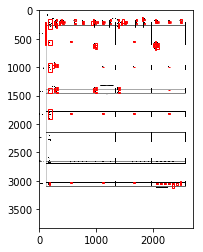

In [8]:
# # draw the bounding box to make sure the coordinates extracted are correct
# # Create figure and axes
# plt.figure(figsize = (12, 20))
# fig,ax = plt.subplots(1)

# # Display the image
# ax.imshow(im)
# print('There are %d symbols in the score' % len(rectangles))
# for rectan in rectangles:
#     # Create a Rectangle patch
#     rect = patches.Rectangle(rectan[1],rectan[2],rectan[3],linewidth=1,edgecolor='r',facecolor='none')

#     # Add the patch to the Axes
#     ax.add_patch(rect)

# plt.show()